In [1]:
from tensorflow.python import keras
keras.__version__

'2.6.0'

In [2]:
from tensorflow.keras.datasets import boston_housing
(X_train,y_train),(X_test,y_test)=boston_housing.load_data()

In [3]:
print(X_train.shape)
print(X_train.shape[1])

(404, 13)
13


In [4]:
X_test.shape

(102, 13)

In [5]:
y_train[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

<AxesSubplot:>

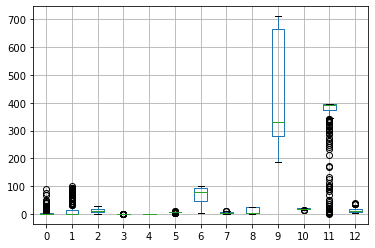

In [6]:
import pandas as pd
pd.DataFrame(X_train).boxplot()

<AxesSubplot:>

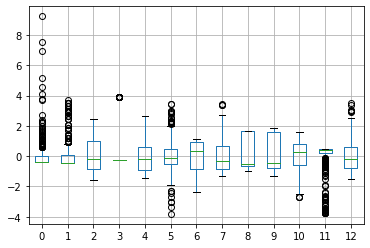

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

pd.DataFrame(X_train_scaled).boxplot()

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [19]:
model=build_model()
hist=model.fit(X_train,y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
41/41 [==============================] - 0s 913us/step - loss: 345.7468 - mae: 11.3194
Epoch 2/100
41/41 [==============================] - 0s 606us/step - loss: 160.1613 - mae: 9.7582
Epoch 3/100
41/41 [==============================] - 0s 701us/step - loss: 141.5457 - mae: 9.3087
Epoch 4/100
41/41 [==============================] - 0s 633us/step - loss: 122.3275 - mae: 8.7706
Epoch 5/100
41/41 [==============================] - 0s 644us/step - loss: 136.2074 - mae: 9.2201
Epoch 6/100
41/41 [==============================] - 0s 693us/step - loss: 117.5565 - mae: 8.3399
Epoch 7/100
41/41 [==============================] - 0s 784us/step - loss: 85.9238 - mae: 7.2639
Epoch 8/100
41/41 [==============================] - 0s 806us/step - loss: 111.3487 - mae: 7.9639
Epoch 9/100
41/41 [==============================] - 0s 709us/step - loss: 101.9508 - mae: 7.4102
Epoch 10/100
41/41 [==============================] - 0s 699us/step - loss: 95.1513 - mae: 7.2382
Epoch 11/100
41/41 [

In [20]:
mse,mae=model.evaluate(X_test,y_test,verbose=1)
print(mse)
print(mae)

4/4 [==============================] - 0s 2ms/step - loss: 36.6144 - mae: 4.5103
36.61442184448242
4.510293006896973


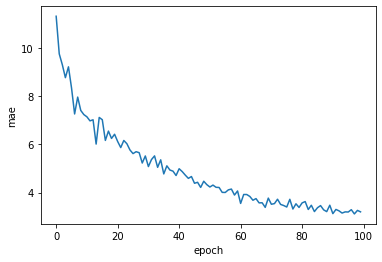

In [21]:
import matplotlib.pyplot as plt
plt.plot(hist.history["mae"])
plt.ylabel('mae')
plt.xlabel('epoch')
plt.show()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
